In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/bank.csv"
BankData = pd.read_csv(url)
BankData.head(5)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [3]:
print(BankData['y'].unique()) #you can use unique if you would like to find out how many unique attributes each variable have

['no' 'yes']


For dictionary of data please refer to https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Our goal is to define a model best predicts outcome y - success of the marketing campaign 

First let's create dummy variables for default, marital, housing, and loan

In [4]:
Default_dummy  = pd.get_dummies(BankData['default'], prefix = 'default')
del Default_dummy['default_no']

marital_dummy  = pd.get_dummies(BankData['marital'], prefix = 'marital')
del marital_dummy['marital_married']
del marital_dummy['marital_divorced']

housing_dummy  = pd.get_dummies(BankData['housing'], prefix = 'housing')
del housing_dummy['housing_no']

loan_dummy = pd.get_dummies(BankData['loan'], prefix = 'loan')
del loan_dummy['loan_no']

y_dummy = pd.get_dummies(BankData['y'], prefix = 'y')
del y_dummy['y_no']



BankData = pd.concat([BankData,marital_dummy , Default_dummy, housing_dummy, loan_dummy, y_dummy], axis=1)
#print(BankData.head())
#print(BankData.describe())

BankData.head()


,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,marital_single,default_yes,housing_yes,loan_yes,y_yes
0,30,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no,0.0,0.0,0.0,0.0,0.0
1,33,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no,0.0,0.0,1.0,1.0,0.0
2,35,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no,1.0,0.0,1.0,0.0,0.0
3,30,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no,0.0,0.0,1.0,1.0,0.0
4,59,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no,0.0,0.0,1.0,0.0,0.0


In [5]:
BankData['Intercept'] = 1
X1 = BankData[['Intercept','age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]
y1 = BankData['y_yes']


#### Task 1: run a logistic regression using statsmodels.api

In [6]:
logit = sm.Logit(y1, X1)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.279689
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                 4521
Model:                          Logit   Df Residuals:                     4511
Method:                           MLE   Df Model:                            9
Date:                Sun, 07 Aug 2016   Pseudo R-squ.:                  0.2173
Time:                        16:31:28   Log-Likelihood:                -1264.5
converged:                       True   LL-Null:                       -1615.5
                                        LLR p-value:                2.503e-145
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -3.2586      0.279    -11.695      0.000        -3.805    -2.712
age                0.0101      0.005      1.905      0.057        -0.000     0.021
balance         1.182e-05   1.58e-05      0.750      0.453     -1.91e-05  4.27e-05
duration           0.0038      0.000     20.782      0.000         0.003     0.004
campaign          -0.0910      0.026     -3.488      0.000        -0.142    -0.040
previous           0.1618      0.023      7.062      0.000         0.117     0.207
marital_single     0.3140      0.129      2.429      0.015         0.061     0.567
default_yes        0.3459      0.412      0.841      0.401        -0.461     1.152
housing_yes       -0.8404      0.111     -7.549      0.000        -1.059    -0.622
loan_yes          -0.8483      0.185     -4.589      0.000        -1.211    -0.486
==================================================================================
"""

#### Task 2: Interpret Campaign, marital_single, housing_yes coefficients.

Answer: For every extra time a client is contacted - the odds of usefulness of marketing campaign decreases by 9.1% - may be clients get frustrated.

The odds of singletones targeted successfully by this campaign is 31.4% more than married people. Perhaps if people are married they need to consult with their spouse but singletones can decide on themselves.

The odds of effectiveness of this campaign on those people who own house is 84.4% less than those who do not. 

#### What are your 10-fold cross-validation accuracy using sklearn library and solver = 'liblinear' and solver =  'newton-cg'? (Set max_iter = 50000 if you get a warning.) What do you learn?

In [7]:
X = BankData[['age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]
y = BankData['y'] #This should be categorical - for statsmodels api that shall be 0 and 1 not necessarily '0' and '1'

In [8]:
from sklearn.cross_validation import cross_val_score
lm = LogisticRegression(solver = 'liblinear', max_iter = 50000)

print("Accuracy with 10 fold CV for liblinear is %f" %cross_val_score(lm, X , y, cv=10, scoring = 'accuracy').mean())
lm2 = LogisticRegression(solver = 'newton-cg', max_iter = 50000)
print("Accuracy with  10 fold CV for newton-cg is %f" %cross_val_score(lm2, X , y, cv=10, scoring = 'accuracy').mean())


Accuracy with 10 fold CV for liblinear is 0.888300
Accuracy with  10 fold CV for newton-cg is 0.888520


#### Construct confusion matrices for logistic regression using solver = 'liblinear' and solver = 'newton-cg'.

In [9]:
from sklearn.metrics import confusion_matrix
lm.fit(X, y)
lm2.fit(X, y)

y_hat_liblinear = lm.predict(X)
print(confusion_matrix(y, y_hat_liblinear))
y_hat_newton = lm2.predict(X)
print(confusion_matrix(y, y_hat_newton))

[[3928   72]
 [ 426   95]]
[[3923   77]
 [ 427   94]]


#### what did we learn from what we observerd in confusion matrices?

Answer: For this case, it seems like both algorithms does almost similar job in prediction. 

#### What is your prediction for a person who is 30 years old, 1000 dollars balance,  with duration = 210 , has been contacted 3 times for this campaign (campaign = 3),  who has previously been contacted 4 times, who is single, never defaulted, home owner and doesn't have any loan?

In [10]:
X = BankData[['age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']]

x1 = [[30,1000,210,3,4,1,0,1,0]]

print(lm.predict(x1))  # our prediction is that our campaign will not be successful
print("Probability of success is %.2f percent"%(lm.predict_proba(x1)[0,1]*100)) 

['no']
Probability of success is 9.15 percent


#### Now standardize your data - you can use standardization method used for KNN algorithms.

In [11]:
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameOfVariables = ['age','balance','duration','campaign','previous']
for i in NameOfVariables:
    BankData[i] = Standardize(BankData[i])
    
X = BankData[['age','balance','duration','campaign','previous','marital_single','default_yes','housing_yes','loan_yes']] 

#### Use 10-fold cross validation to find the best tuning parameter - C. Use 'liblinear' and l1 penalty

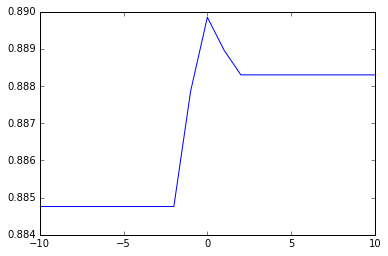

Our optimal C is 1.000000
Our accuracy at optimal C is 0.889848


In [12]:

# Try testing and plot
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

#### Localize your search around the value you found above

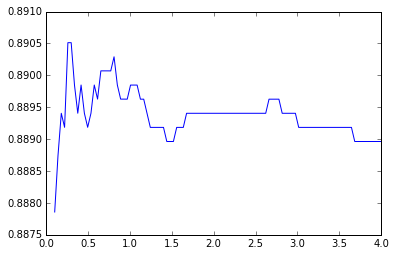

Our optimal C is 0.257576
Our accuracy at optimal C is 0.890513


In [13]:
c_list = np.linspace(0.1,4,100) 
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_list, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

#### Now use the best C you found above and repeat your analysis and check your coefficients

In [14]:
lm = LogisticRegression(C = 0.257576,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
lm.fit(X,y)
print(lm.coef_)


[[  0.03940439   0.          10.06343245  -0.15414654   2.81565503
    0.1535534    0.          -0.8134474   -0.7448273 ]]


In [15]:
#Now zip name of variables and your coefficients
Var_coef = zip(lm.coef_[0,:],X.columns.values)
print(Var_coef)

[(0.039404389307505325, 'age'), (0.0, 'balance'), (10.063432446339243, 'duration'), (-0.15414653964008895, 'campaign'), (2.8156550297040255, 'previous'), (0.15355340090341166, 'marital_single'), (0.0, 'default_yes'), (-0.81344740264135507, 'housing_yes'), (-0.74482729980274553, 'loan_yes')]


#### If you would like to drop 2 variables from your analysis, which variables are you going to choose?

Answer: Balance and default_yes.  

#### Compare the results you found out above with p-values of statsmodels api. Do you have same story there? 

Answer: Yes! The these two varaibles were not significant in statsmodels api either.